In [3]:
# Import necessary libraries
import sys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot") #Setting plot style for better aesthetics
plt.rcParams['figure.figsize'] = (12, 8) #Default figure size for plots
import seaborn as sns #For enhanced data visualizations
sns.set(style='whitegrid', color_codes=True) #Setting seaborn style

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#enhance results by repetitive values-

In [4]:
# Load the dataset
df = pd.read_csv('PCOS_clean_data_without_infertility.csv')
df.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
PCOS (Y/N),0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Age (yrs),28.00,36.00,33.00,37.00,25.00,36.00,34.00,33.00,32.00,36.00,20.00,26.00
Weight (Kg),44.60,65.00,68.80,65.00,52.00,74.10,64.00,58.50,40.00,52.00,71.00,49.00
Height(Cm),152.00,161.50,165.00,148.00,161.00,165.00,156.00,159.00,158.00,150.00,163.00,160.00
BMI,19.30,24.92,25.27,29.67,20.06,27.22,26.30,23.14,16.02,23.11,26.72,19.14
Blood Group,15.00,15.00,11.00,13.00,11.00,15.00,11.00,13.00,11.00,15.00,15.00,13.00
Pulse rate(bpm),78.00,74.00,72.00,72.00,72.00,78.00,72.00,72.00,72.00,80.00,80.00,72.00
RR (breaths/min),22.00,20.00,18.00,20.00,18.00,28.00,18.00,20.00,18.00,20.00,20.00,20.00
Hb(g/dl),10.48,11.70,11.80,12.00,10.00,11.20,10.90,11.00,11.80,10.00,10.00,9.50
Cycle(R/I),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [5]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1   Age (yrs)               538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14  I   beta-HCG(mIU/mL)    538 non-null    fl

In [6]:
#Display the count of target variable categories
print(df['PCOS (Y/N)'].value_counts())

PCOS (Y/N)
0    362
1    176
Name: count, dtype: int64


**Splitting Categorical And Numerical Features**

In [7]:
# Extract categorical columns relevant to the analysis
df_cat = df[["Age (yrs)",
            "Pregnant(Y/N)",
             "Cycle(R/I)",
             "Blood Group",
             "Cycle length(days)",
             "No. of aborptions",
             "Weight gain(Y/N)",
             "hair growth(Y/N)",
             "Skin darkening (Y/N)",
             "Hair loss(Y/N)",
             "Pimples(Y/N)",
             "Fast food (Y/N)",
             "Reg.Exercise(Y/N)",

]]

In [8]:
# Check the shape of the categorical feature dataframe
df_cat.shape

(538, 13)

In [9]:
# Separate the target variable
df_target = df[["PCOS (Y/N)"]]

In [10]:
# Create a dataframe with only numerical features
df_corr_num = df.drop(df_cat.columns,axis=1)

In [11]:
# Get column names of numerical features
list(df_corr_num.columns)

['PCOS (Y/N)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [12]:
# Drop target column from numerical features
df_num = df.drop(df_cat.columns,axis=1)
df_num.drop(["PCOS (Y/N)"], axis=1, inplace= True)

In [13]:
# Combine target variable with numerical features for correlation analysis
df_corr_num = pd.concat([df_target, df_num], axis=1, sort = False)
#pd.concat([df1, df4], axis=1, sort=False)

In [14]:
df_corr_num.head()

,PCOS (Y/N),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Marraige Status (Yrs),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,44.6,152.0,19.30,78,22,10.48,7.0,1.99,1.99,...,17.1,0.57,92.0,110,80,3,3,18.0,18.0,8.5
1,0,65.0,161.5,24.92,74,20,11.70,11.0,60.80,1.99,...,61.3,0.97,92.0,120,70,3,5,15.0,14.0,3.7
2,1,68.8,165.0,25.27,72,18,11.80,10.0,494.08,494.08,...,49.7,0.36,84.0,120,80,13,15,18.0,20.0,10.0
3,0,65.0,148.0,29.67,72,20,12.00,4.0,1.99,1.99,...,33.4,0.36,76.0,120,70,2,2,15.0,14.0,7.5
4,0,52.0,161.0,20.06,72,18,10.00,1.0,801.45,801.45,...,43.8,0.38,84.0,120,80,3,4,16.0,14.0,7.0


Finding Correlations
Kendall's Method

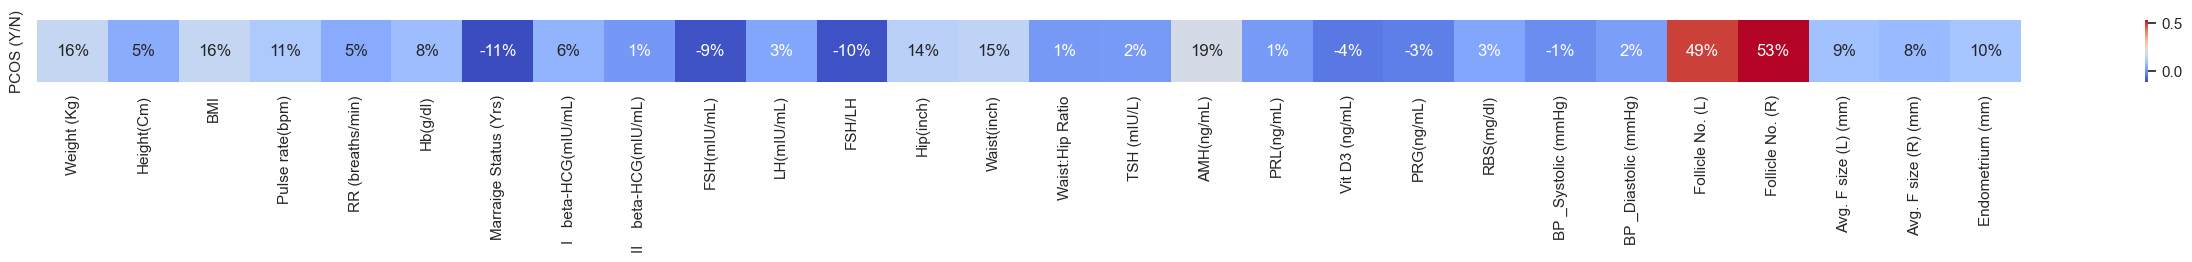

In [15]:
# Numerical Input - Categorical Output
# Kendall's Method
# Visualize correlations between target and numerical features using Kendall's method
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=df_corr_num.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'


);

**Chi Square**

In [16]:
# Calculate chi-squared statistics between categorical features and target
chi2(df_cat,df_target)[0]

array([14.70744141,  0.25349022, 62.44807843,  0.1503457 ,  8.18879387,
        2.93170268, 65.57462287, 84.87561637, 86.41344383,  9.15831179,
       23.09660161, 37.73891888,  2.10350412])

In [17]:
chi2(df_cat,df_target)[1] # p-values

array([1.25549881e-04, 6.14628158e-01, 2.73562597e-15, 6.98205214e-01,
       4.21499375e-03, 8.68558453e-02, 5.59546449e-16, 3.17737490e-20,
       1.45989104e-20, 2.47590879e-03, 1.54062757e-06, 8.08748208e-10,
       1.46962000e-01])

In [18]:
# Display p-values in a dataframe
pd.DataFrame.from_records(np.reshape(chi2(df_cat,df_target)[1], (1,-1)), index= list(df_target.columns), columns=list(df_cat.columns)) # p-values


,Age (yrs),Pregnant(Y/N),Cycle(R/I),Blood Group,Cycle length(days),No. of aborptions,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
PCOS (Y/N),0.000126,0.614628,2.735626e-15,0.698205,0.004215,0.086856,5.595464e-16,3.177375e-20,1.459891e-20,0.002476,0.000002,8.087482e-10,0.146962


In [19]:
# Create a dataframe for chi-squared statistics
df_corr_chi = pd.DataFrame.from_records(np.reshape(chi2(df_cat,df_target)[0], (1,-1)), index= list(df_target.columns), columns=list(df_cat.columns))

<Axes: >

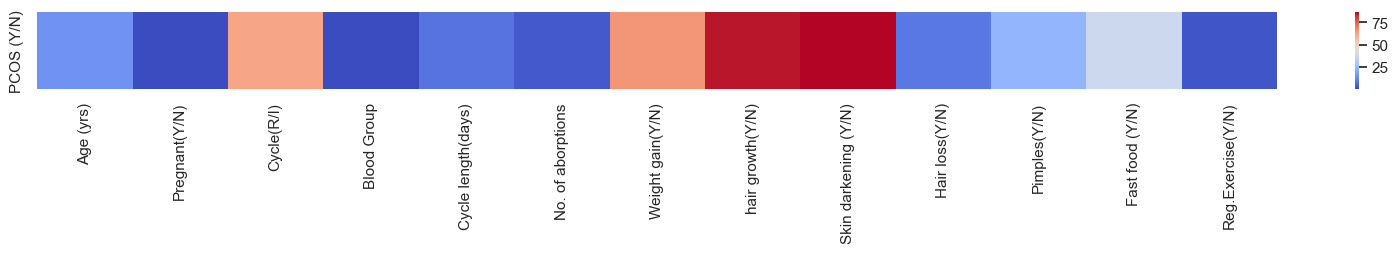

In [20]:
# Categorical Input - Categorical Output
# Chi Square Method
# Visualize chi-squared correlations
plt.figure(figsize=(20, 1))
sns.heatmap(
    data= df_corr_chi,
    annot=False,
    cmap='coolwarm'
)

In [21]:
# Display chi-square statistics dataframe
df_corr_chi

,Age (yrs),Pregnant(Y/N),Cycle(R/I),Blood Group,Cycle length(days),No. of aborptions,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
PCOS (Y/N),14.707441,0.25349,62.448078,0.150346,8.188794,2.931703,65.574623,84.875616,86.413444,9.158312,23.096602,37.738919,2.103504


In [22]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix

In [23]:
df = pd.read_csv('PCOS_clean_data_without_infertility.csv')
df.head(12)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.30,15,78,22,10.48,0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.92,15,74,20,11.70,0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.27,11,72,18,11.80,0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.67,13,72,20,12.00,0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.06,11,72,18,10.00,0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,0,36,74.1,165.0,27.22,15,78,28,11.20,0,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,0,34,64.0,156.0,26.30,11,72,18,10.90,0,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,0,33,58.5,159.0,23.14,13,72,20,11.00,0,...,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,0,32,40.0,158.0,16.02,11,72,18,11.80,0,...,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,0,36,52.0,150.0,23.11,15,80,20,10.00,1,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1   Age (yrs)               538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14  I   beta-HCG(mIU/mL)    538 non-null    fl

In [25]:
# Drop irrelevant or redundant features
X = df.drop(["PCOS (Y/N)",
            "Blood Group",
            "Height(Cm)",
            "Pregnant(Y/N)",
             "PRG(ng/mL)",
            "RR (breaths/min)",
            "No. of aborptions",
            "FSH/LH",
            "I   beta-HCG(mIU/mL)",
            "II    beta-HCG(mIU/mL)",
            "TSH (mIU/L)",
            "FSH(mIU/mL)",
            "LH(mIU/mL)",
            "Waist:Hip Ratio",
            "PRL(ng/mL)",
            "BP _Diastolic (mmHg)",
            "BP _Systolic (mmHg)",
            "Reg.Exercise(Y/N)",
            "RBS(mg/dl)"
            ],axis=1)

In [26]:
X

,Age (yrs),Weight (Kg),BMI,Pulse rate(bpm),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Hip(inch),Waist(inch),...,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,19.30,78,10.48,0,5,7.0,36,30,...,0,0,0,0,1.0,3,3,18.0,18.0,8.5
1,36,65.0,24.92,74,11.70,0,5,11.0,38,32,...,0,0,0,0,0.0,3,5,15.0,14.0,3.7
2,33,68.8,25.27,72,11.80,0,5,10.0,40,36,...,0,0,1,1,1.0,13,15,18.0,20.0,10.0
3,37,65.0,29.67,72,12.00,0,5,4.0,42,36,...,0,0,0,0,0.0,2,2,15.0,14.0,7.5
4,25,52.0,20.06,72,10.00,0,5,1.0,37,30,...,0,0,1,0,0.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,35,50.0,18.46,72,11.00,0,5,8.0,28,26,...,0,0,0,0,0.0,1,0,17.5,10.0,6.7
534,30,63.2,25.32,72,10.80,0,5,4.0,34,32,...,0,0,0,0,0.0,9,7,19.0,18.0,8.2
535,36,54.0,23.37,74,10.80,0,6,8.0,30,28,...,0,0,0,0,0.0,1,0,18.0,9.0,7.3
536,27,50.0,22.22,74,12.00,1,2,2.0,28,26,...,0,0,0,1,0.0,7,6,18.0,16.0,11.5


In [27]:
# Define the target variable
y = df[["PCOS (Y/N)"]]

In [28]:
# Function to evaluate model performance
def test_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn)/(tp + fp + tn + fn)
    print("Accuracy: ", '{:.2f}'.format(accuracy * 100))
    print("True Negative:", tn)
    print("True Positve:", tp)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print()
    print("-------------------------------------------------------")
     # Negative class metrics
    print("Negative Class Results")
    precision = (tp / (tp + fp))
    recall =  (tp  / (tp + fn))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (N): ", '{:.2f}'.format(precision * 100))
    print("Recall (N): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (N):" ,  '{:.2f}'.format(f1_score * 100))
    print()
    print("-------------------------------------------------------")
     # Positive class metrics
    print("Positive Class Results")
    precision = (tn / (tn + fn))
    recall =  (tn  / (tn + fp))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (P): ", '{:.2f}'.format(precision * 100))
    print("Recall (P): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (P):" , '{:.2f}'.format(f1_score * 100))

In [29]:
# Install and use yellowbrick for visualizing confusion matrix
pip install yellowbrick

SyntaxError: invalid syntax (1976286690.py, line 2)

In [ ]:
from yellowbrick.classifier import confusion_matrix

def vis_conf(model, X_test, y_test):
    plt.figure(figsize=(6, 5))
    visualizer = confusion_matrix(
        model,
        X_test, y_test,
        is_fitted=True,
        classes=['Negative', 'Positive']
    )
    visualizer.show();

In [ ]:
# Display library versions for compatibility
import sklearn
import imblearn

# Print the versions of the libraries
print(f"scikit-learn version: {sklearn.__version__}")
print(f"imbalanced-learn version: {imblearn.__version__}")


In [ ]:
# Resample the dataset using SMOTEENN to handle class imbalance
from imblearn.combine import SMOTEENN

resample = SMOTEENN(sampling_strategy=1/1, random_state =0)
X, y = resample.fit_resample(X, y)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)

In [ ]:
# Normalize feature values to scale between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


# Setting Column Names from dataset
X_train.columns = X.columns
X_test.columns = X.columns

In [ ]:
X_train.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=1500, criterion="entropy", random_state=0)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
# Evaluate the model
test_results(rf, X_test, y_test)

In [ ]:
vis_conf(rf, X_test, y_test)

In [ ]:
# Train and evaluate an XGBoost classifier
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1500, learning_rate=0.3,scale_pos_weight=10,
                            random_state= 0, n_jobs=-1)

In [ ]:
sum(cross_val_score(xgb, X, y, cv=10))/10

In [ ]:
xgb = xgb.fit(X_train, y_train)

In [ ]:
test_results(xgb, X_test, y_test)

In [ ]:
vis_conf(xgb, X_test, y_test)

In [ ]:
# Save the Random Forest model for future use
import pickle
pickle.dump(rf, open('modelfinal1.pkl', 'wb'))